# Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
from itertools import product
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

# 1. Importing Dataframes

In [2]:
# Setting variables
path_mac = r'/Users/saikathalder/CareerFoundry/Data Immersion/Achievement 4/Instacart Basket Analysis 01182024'
path_win = r'C:\Users\Saikat Halder\Documents\CareerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis 01182024'
# Importing Merged Dataframe
df_combined= pd.read_pickle(os.path.join(path_mac, '02 Data', 'Prepared Data', 'orders_products_customers_merged_final.pkl'))
df_department= pd.read_csv(os.path.join(path_mac, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),index_col = False)

In [3]:
# Verifying Dataframe
df_combined.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income,...,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_reorder,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid range products,Busiest days,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid range products,Regulary busy,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid range products,Busiest days,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low range products,Regulary busy,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low range products,Slowest days,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,both


In [4]:
# droppping '_merge' column
df_combined = df_combined.drop(columns = '_merge')


In [5]:
# Verifying columns
df_combined.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'marital_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_label', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_product_price', 'spending_flag',
       'median_reorder', 'order_frequency_flag'],
      dtype='object')

# 2. PII Information 

### This data set has the following Personally Indentifiable Information (PII): 
#### first_name 
#### last_name
#### gender
#### age
#### number_of_dependents
#### marital_status
#### income
### This customer information has been fibricated for the purpose of this project and poses no threat.

# 3. Spending habits based on regions

In [6]:
# Getting the list of states in alphabetical order
df_combined['state'].value_counts().sort_index()

state
Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
Ne

## 3.1. Creating Regions

In [7]:
# Northeast
df_combined.loc[(df_combined['state']=='Maine')|
                (df_combined['state']=='New Hampshire')|
                (df_combined['state']=='Vermont')|
                (df_combined['state']=='Massachusetts')|
                (df_combined['state']=='Rhode Island')|
                (df_combined['state']=='Connecticut')|
                (df_combined['state']=='New York')|
                (df_combined['state']=='Pennsylvania')|
                (df_combined['state']=='New Jersey'), 
                                                    'region'] = 'Northeast'


In [8]:
# Midwest
df_combined.loc[(df_combined['state']=='Wisconsin')|
                (df_combined['state']=='Michigan')|
                (df_combined['state']=='Illinois')|
                (df_combined['state']=='Indiana')|
                (df_combined['state']=='Ohio')|
                (df_combined['state']=='North Dakota')|
                (df_combined['state']=='South Dakota')|
                (df_combined['state']=='Nebraska')|
                (df_combined['state']=='Kansas')|
                (df_combined['state']=='Minnesota')|
                (df_combined['state']=='Iowa')|
                (df_combined['state']=='Missouri'), 
                                                    'region'] = 'Midwest'

In [9]:
# South
df_combined.loc[(df_combined['state']=='Delaware')|
                (df_combined['state']=='Maryland')|
                (df_combined['state']=='District of Columbia')|
                (df_combined['state']=='Virginia')|
                (df_combined['state']=='West Virginia')|
                (df_combined['state']=='North Carolina')|
                (df_combined['state']=='South Carolina')|
                (df_combined['state']=='Georgia')|
                (df_combined['state']=='Florida')|
                (df_combined['state']=='Kentucky')|
                (df_combined['state']=='Tennessee')|
                (df_combined['state']=='Mississippi')|
                (df_combined['state']=='Alabama')|
                (df_combined['state']=='Oklahoma')|
                (df_combined['state']=='Texas')|
                (df_combined['state']=='Arkansas')|
                (df_combined['state']=='Louisiana'), 
                                                    'region'] = 'South'

In [10]:
# West
df_combined.loc[(df_combined['state']=='Idaho')|
                (df_combined['state']=='Montana')|
                (df_combined['state']=='Wyoming')|
                (df_combined['state']=='Nevada')|
                (df_combined['state']=='Utah')|
                (df_combined['state']=='Colorado')|
                (df_combined['state']=='Arizona')|
                (df_combined['state']=='New Mexico')|
                (df_combined['state']=='Alaska')|
                (df_combined['state']=='Washington')|
                (df_combined['state']=='Oregon')|
                (df_combined['state']=='California')|
                (df_combined['state']=='Hawaii'), 
                                                    'region'] = 'West'

In [11]:
# Frequency Count for Region
df_combined['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## 3.2. Crosstab between 'region' and 'spending_flag'

In [12]:
# Creating a new variable for crosstab
regional_spending_flag = pd.crosstab(df_combined['region'], df_combined['spending_flag'], dropna = False)
# Viewing 'regional_spending_flag'
regional_spending_flag

spending_flag,High spender,Low spender
region,,
Midwest,7589534,7791
Northeast,5717129,5607
South,10781873,10012
West,8284425,8488


In [13]:
# Percentage of High Spenders
regional_spending_flag['Percentage of High Spenders'] = (regional_spending_flag['High spender'] / 
                                                        (regional_spending_flag['High spender'] + regional_spending_flag['Low spender'])) * 100
# Percentage of High Spenders
regional_spending_flag['Percentage of Low Spenders'] = (regional_spending_flag['Low spender'] / 
                                                        (regional_spending_flag['High spender'] + regional_spending_flag['Low spender'])) * 100
# Print the crosstab
regional_spending_flag


spending_flag,High spender,Low spender,Percentage of High Spenders,Percentage of Low Spenders
region,,,,
Midwest,7589534,7791,99.897451,0.102549
Northeast,5717129,5607,99.902022,0.097978
South,10781873,10012,99.907227,0.092773
West,8284425,8488,99.897648,0.102352


#### From the first glance, it seems that South has the highest 'High Spenders' as well as the highest 'Low spenders' and Northeast has the lowest. However if we look at the percentage of High spenders and percentage of Low spenders, there is very little difference between different regions. If we round it up, it can be summarized that 99.90 % of spenders are high spenders and 0.10 % are low spenders and this is consistent for all the regions.

#### It can be concluded that there is no difference in spending habits between the different US Regions

# 4. Create a subset with High Activity Customers

## 4.1. Create exclusion flag

In [14]:
# Create a exclusion flag for customers with less than 5 orders
df_combined.loc[df_combined['max_order'] <5, 'activity'] = 'Low activity customer'
df_combined.loc[df_combined['max_order'] >=5, 'activity'] = 'High activity customer'

In [15]:
# Frequency Count for activity
df_combined['activity'].value_counts()

activity
High activity customer    30964564
Low activity customer      1440295
Name: count, dtype: int64

## 4.2. Create a new dataframe with High activity customers 

In [16]:
# Checking the number of rows for the whole dataset
row_orginal = df_combined.shape[0]
row_orginal

32404859

In [17]:
# Creating new dataframe 'df_combined_high_activity_customers'
df_combined_filtered = df_combined[df_combined['activity'] == 'High activity customer']

In [18]:
# Exporting the new Dataframe - 'df_combined_high_activity_customers'
df_combined_filtered.to_pickle(os.path.join(path_mac, '02 Data', 'Prepared Data', 'orders_products_customers_merged_final_high_value_customers.pkl'))

# 5.0 Customer profile

## 5.1. Create Customer Profile based on age, income, marital_status and number_of_dependents

### We will be using the filtered dataframe from now on where only the High Activity Customers are present

### Age 

In [19]:
# Checking age Frequency Count
df_combined_filtered[['age']].value_counts()

age
79     508337
49     507879
48     506730
31     506218
64     504832
        ...  
60     461897
36     460649
66     454604
41     451269
25     449324
Name: count, Length: 64, dtype: int64

In [20]:
# Checking mean, min ,max
df_combined_filtered.agg({'age': ['mean', 'min', 'max']})

,age
mean,49.468026
min,18.000000
max,81.000000


In [21]:
# Creating a new column 'age_group' and categorizing based on age
# Adult (18-29)
df_combined_filtered.loc[(df_combined_filtered['age'] < 30) & (df_combined_filtered['age'] >= 18), 'age_group'] = 'Adult'
# Middle aged (30-64)
df_combined_filtered.loc[(df_combined_filtered['age'] < 65) & (df_combined_filtered['age'] >= 30 ), 'age_group'] = 'Middle aged'
# Senior Citizens (65 and over)
df_combined_filtered.loc[df_combined_filtered['age'] >= 65, 'age_group'] = 'Senior citizens'

/var/folders/md/yr101r7n2t94rx1x6z37fbm00000gn/T/ipykernel_32926/1898131873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered.loc[(df_combined_filtered['age'] < 30) & (df_combined_filtered['age'] >= 18), 'age_group'] = 'Adult'


In [22]:
# Frequency count for 'age_group'
df_combined_filtered[['age_group']].value_counts(dropna=False)

age_group      
Middle aged        16951417
Senior citizens     8195544
Adult               5817603
Name: count, dtype: int64

### Income

In [23]:
# Checking income Frequency Count
df_combined_filtered[['income']].value_counts()

income
72344     4395
112610    4242
57501     4136
115620    3831
36163     3657
          ... 
36018        5
128931       5
33040        5
90002        5
147660       2
Name: count, Length: 96069, dtype: int64

In [24]:
# Checking 'income' mean, min ,max
df_combined_filtered.agg({'income': ['mean', 'min', 'max', 'std']})

,income
mean,99675.865108
min,25903.000000
max,593901.000000
std,43141.865526


In [25]:
# Categorizing Income based on mean and 1 standard deviation and assigning variable to it
# Standard Deviation of Income
std_dev_income = df_combined_filtered['income'].std()
# Average Income = Mean income
avg_income = df_combined_filtered['income'].mean()
# Above Average Income
above_avg_income = avg_income + std_dev_income
# Below Average Income
below_avg_income = avg_income - std_dev_income
# Print the variables
print('Average Income =', avg_income, '\nAbove Average Income is =', above_avg_income, '\nBelow Average Income = ', below_avg_income)

Average Income = 99675.86510754681 
Above Average Income is = 142817.73063356258 
Below Average Income =  56533.99958153103


In [26]:
df_combined_filtered.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income,...,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_reorder,order_frequency_flag,region,activity,age_group
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,Midwest,High activity customer,Middle aged
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,Midwest,High activity customer,Middle aged
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,Midwest,High activity customer,Middle aged
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,Midwest,High activity customer,Middle aged
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,Midwest,High activity customer,Middle aged


In [27]:
# Creating a new flag column 'income_level' and categorizing based on income level
df_combined_filtered.loc[df_combined_filtered['income'] >= above_avg_income, 'income_level'] = 'Above Avg Income'
df_combined_filtered.loc[(df_combined_filtered['income'] < above_avg_income) & (df_combined_filtered['income'] >= below_avg_income ), 'income_level'] = 'Avg Income'
df_combined_filtered.loc[df_combined_filtered['income'] < below_avg_income, 'income_level'] = 'Below Avg Income'

/var/folders/md/yr101r7n2t94rx1x6z37fbm00000gn/T/ipykernel_32926/2613922098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered.loc[df_combined_filtered['income'] >= above_avg_income, 'income_level'] = 'Above Avg Income'


In [28]:
# Frequency Count for 'Income_Level'
df_combined_filtered['income_level'].value_counts(dropna = False)

income_level
Avg Income          20923960
Above Avg Income     5173082
Below Avg Income     4867522
Name: count, dtype: int64

### Number of Dependents

In [29]:
# Checking number_of_dependents Frequency Count
df_combined_filtered[['number_of_dependents']].value_counts()

number_of_dependents
3                       7772516
0                       7739681
2                       7733261
1                       7719106
Name: count, dtype: int64

In [30]:
# Creating a new column with 'is_parent' flag which determines if customer has children or not
df_combined_filtered.loc[df_combined_filtered['number_of_dependents'] > 0, 'is_parent'] = 'has children'
df_combined_filtered.loc[df_combined_filtered['number_of_dependents'] <= 0, 'is_parent'] = 'does not have children'

/var/folders/md/yr101r7n2t94rx1x6z37fbm00000gn/T/ipykernel_32926/3904849086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered.loc[df_combined_filtered['number_of_dependents'] > 0, 'is_parent'] = 'has children'


In [31]:
df_combined_filtered[['is_parent']].value_counts(dropna = False)

is_parent             
has children              23224883
does not have children     7739681
Name: count, dtype: int64

In [32]:
df_combined_filtered.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'marital_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_label', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_product_price', 'spending_flag',
       'median_reorder', 'order_frequency_flag', 'region', 'activity',
       'age_group', 'income_level', 'is_parent'],
      dtype='object')

### Creating Customer Profile

In [33]:
# Creating an array for unique values in all the profiling variables
age_categories = df_combined_filtered['age_group'].unique()
income_categories = df_combined_filtered['income_level'].unique()
household_categories = df_combined_filtered['is_parent'].unique()
marital_categories =  df_combined_filtered['marital_status'].unique()
# Creating a list by using product function from itertools to generate all possible combination of unique values.
all_combinations = list(product(age_categories, income_categories, household_categories, marital_categories))

In [34]:
# Creating a new column 'customer_profile'
df_combined_filtered['customer_profile'] = ''

# Using a for loop to iterate over each combination of age, income, household, and marital status
for combination in all_combinations:
    age, income, household, marital = combination
    filter_condition = (df_combined_filtered['age_group'] == age) & \
                       (df_combined_filtered['income_level'] == income) & \
                       (df_combined_filtered['is_parent'] == household) & \
                       (df_combined_filtered['marital_status'] == marital)
    df_combined_filtered.loc[filter_condition, 'customer_profile'] = f'{age}_{marital}_{income}_{household}'

/var/folders/md/yr101r7n2t94rx1x6z37fbm00000gn/T/ipykernel_32926/1042158022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered['customer_profile'] = ''


In [35]:
# Frequency count for 'customer_profile'
df_combined_filtered['customer_profile'].value_counts(dropna = False)

customer_profile
Middle aged_married_Avg Income_has children                                 8544825
Senior citizens_married_Avg Income_has children                             3964755
Middle aged_single_Avg Income_does not have children                        2437507
Middle aged_married_Above Avg Income_has children                           2243279
Adult_married_Avg Income_has children                                       2117290
Middle aged_married_Below Avg Income_has children                           1893208
Senior citizens_married_Above Avg Income_has children                       1568602
Senior citizens_divorced/widowed_Avg Income_does not have children          1309861
Adult_living with parents and siblings_Avg Income_has children              1087962
Adult_single_Avg Income_does not have children                              1059197
Adult_married_Below Avg Income_has children                                  740156
Senior citizens_married_Below Avg Income_has children      

In [36]:
# Verifying of the number of records in 'df_combined_filtered' mtaches with the summation of frequency counts from 'customer_profile'

# Setting variables
total_count = df_combined_filtered.shape[0]
count_customer_profile = df_combined_filtered['customer_profile'].value_counts(dropna = False).sum()

# Using if function
if total_count == count_customer_profile:
    print('The number of records in "df_combined_filtered" mtaches with the summation of frequency counts from "customer_profile"')
else:
    print('Something is wrong. Look back at the logic')

The number of records in "df_combined_filtered" mtaches with the summation of frequency counts from "customer_profile"


## Crosstab between Customer Profile and orders_day_of_week


In [37]:
# Using the crosstab function to link customer_profile with order_day_of_week
cross_tab_day_of_week = pd.crosstab(df_combined_filtered['customer_profile'], df_combined_filtered['order_day_of_week'])

In [38]:
# Exporting to excel
cross_tab_day_of_week.to_clipboard()

### Creating a subset with the highest day of the week

In [39]:
# Find the index of the maximum value for each row
max_day_of_week_index = cross_tab_day_of_week.idxmax(axis=1)

# Extract the corresponding maximum values
max_day_of_week_counts = cross_tab_day_of_week.max(axis=1)

# Create a DataFrame with 'customer_profile', 'max_order_day_of_week', and 'frequency' columns
df_subset_max_day_csprfl = pd.DataFrame({
    'customer_profile': max_day_of_week_index.index,
    'max_order_day_of_week': max_day_of_week_index.values,
    'frequency': max_day_of_week_counts.values
})

df_subset_max_day_csprfl

,customer_profile,max_order_day_of_week,frequency
0,Adult_living with parents and siblings_Above A...,0,2966
1,Adult_living with parents and siblings_Avg Inc...,0,213055
2,Adult_living with parents and siblings_Below A...,1,71699
3,Adult_married_Above Avg Income_has children,0,5428
4,Adult_married_Avg Income_has children,0,417006
5,Adult_married_Below Avg Income_has children,1,135307
6,Adult_single_Above Avg Income_does not have ch...,1,2365
7,Adult_single_Avg Income_does not have children,0,209513
8,Adult_single_Below Avg Income_does not have ch...,1,71557
9,Middle aged_divorced/widowed_Above Avg Income_...,0,30615


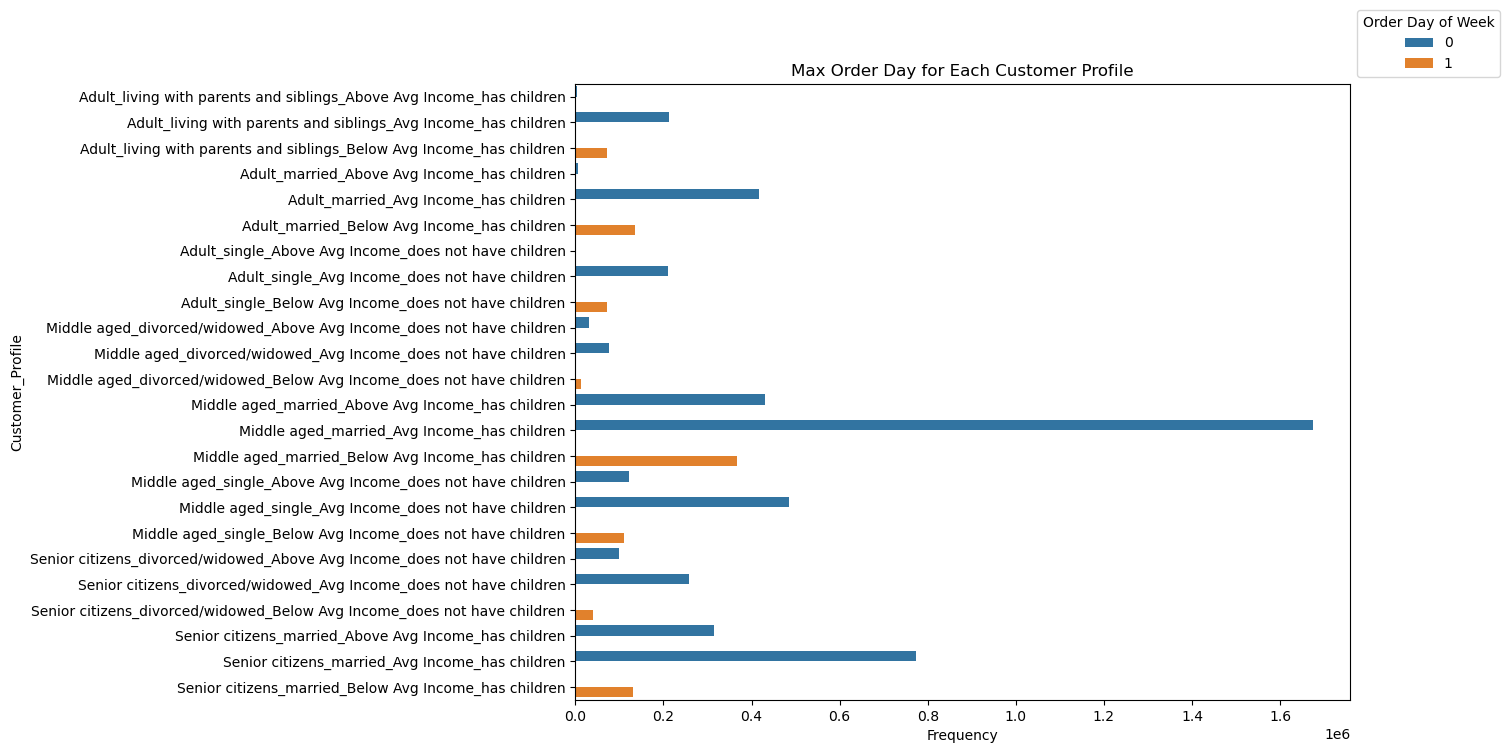

In [40]:
#Creating a Barchar with max order day for each customer_profile

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
bar_top_day_of_week_custprof = sns.barplot(x='frequency', y='customer_profile', hue='max_order_day_of_week', data=df_subset_max_day_csprfl, dodge=True)

# Set labels and title
bar_top_day_of_week_custprof.set(xlabel = 'Frequency', ylabel = 'Customer_Profile', title = 'Max Order Day for Each Customer Profile')


# Show the legend
plt.legend(title='Order Day of Week', bbox_to_anchor=(1, 1))

In [41]:
#Exporting the chart
bar_top_day_of_week_custprof.figure.savefig(os.path.join(path_mac, '04 Analysis','Visualizations', 'bar_top_day_of_week_custprof.png'),bbox_inches='tight')

### Most of the customers prefer to go either in Saturday or Sunday. Customers with below Average Income prefers to go on Saturday whereas Customers with Average and Above Average Income prefers to go on Sundays

## Crosstab between Customer Profile and order_hour_of_day


In [42]:
# Using the crosstab function to link customer_profile with order_hour_of_day
cross_tab_hour_of_day = pd.crosstab(df_combined_filtered['customer_profile'], df_combined_filtered['order_hour_of_day'])

In [43]:
# Exporting to excel
cross_tab_hour_of_day.to_clipboard()

### Creating Subset with hour of day when frequency of orders are the highest

In [44]:
# Find the index of the maximum value for each row
max_hour_of_day_index = cross_tab_hour_of_day.idxmax(axis=1)

# Extract the corresponding maximum values
max_hour_of_day_counts = cross_tab_hour_of_day.max(axis=1)

# Create a DataFrame with 'customer_profile', 'max_order_hour_of_day', and 'frequency' columns
df_subset_max_hour_csprfl = pd.DataFrame({
    'customer_profile': max_hour_of_day_index.index,
    'max_hour_of_day': max_hour_of_day_index.values,
    'frequency': max_hour_of_day_counts.values
})

df_subset_max_hour_csprfl

,customer_profile,max_hour_of_day,frequency
0,Adult_living with parents and siblings_Above A...,11,1778
1,Adult_living with parents and siblings_Avg Inc...,11,91442
2,Adult_living with parents and siblings_Below A...,10,36004
3,Adult_married_Above Avg Income_has children,10,2993
4,Adult_married_Avg Income_has children,11,179094
5,Adult_married_Below Avg Income_has children,10,69201
6,Adult_single_Above Avg Income_does not have ch...,15,1379
7,Adult_single_Avg Income_does not have children,14,88584
8,Adult_single_Below Avg Income_does not have ch...,10,34557
9,Middle aged_divorced/widowed_Above Avg Income_...,10,13653


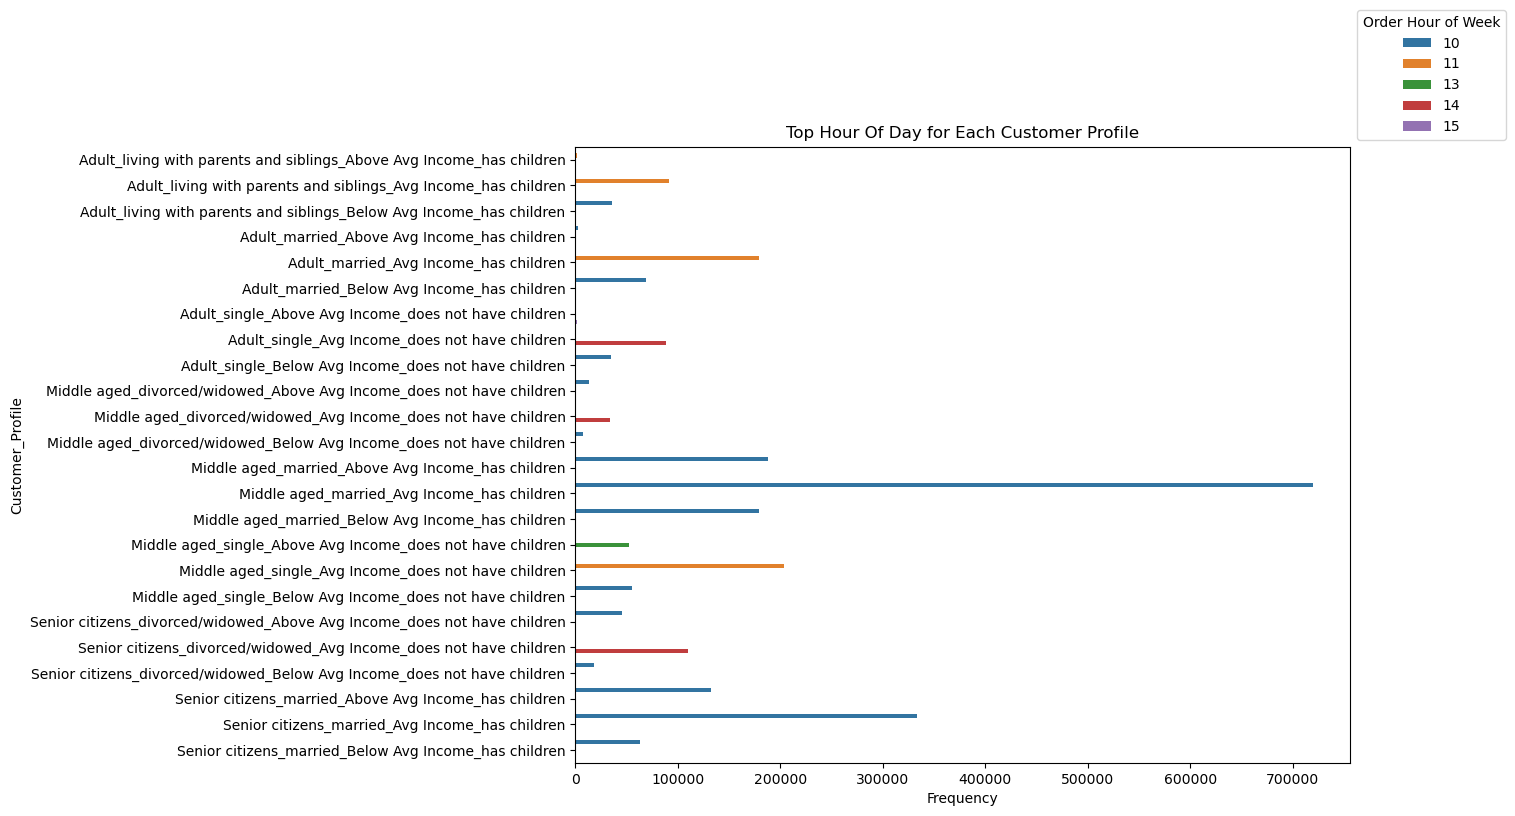

In [45]:
#Creating a Barchar with max order day for each customer_profile

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
bar_max_hour_of_day_custprof = sns.barplot(x='frequency', y='customer_profile', hue='max_hour_of_day', data=df_subset_max_hour_csprfl, dodge=True)

# Set labels and title
bar_max_hour_of_day_custprof.set(xlabel = 'Frequency', ylabel = 'Customer_Profile', title = 'Top Hour Of Day for Each Customer Profile')


# Show the legend
plt.legend(title='Order Hour of Week', bbox_to_anchor=(1, 1))

In [46]:
#Exporting the chart
bar_max_hour_of_day_custprof.figure.savefig(os.path.join(path_mac, '04 Analysis','Visualizations', 'bar_max_hour_of_day_custprof.png'),bbox_inches='tight')

# 6. Visualization to show distribution of profiles 

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Customer_Profile'),
 Text(0.5, 1.0, 'Customer Profile Distribition')]

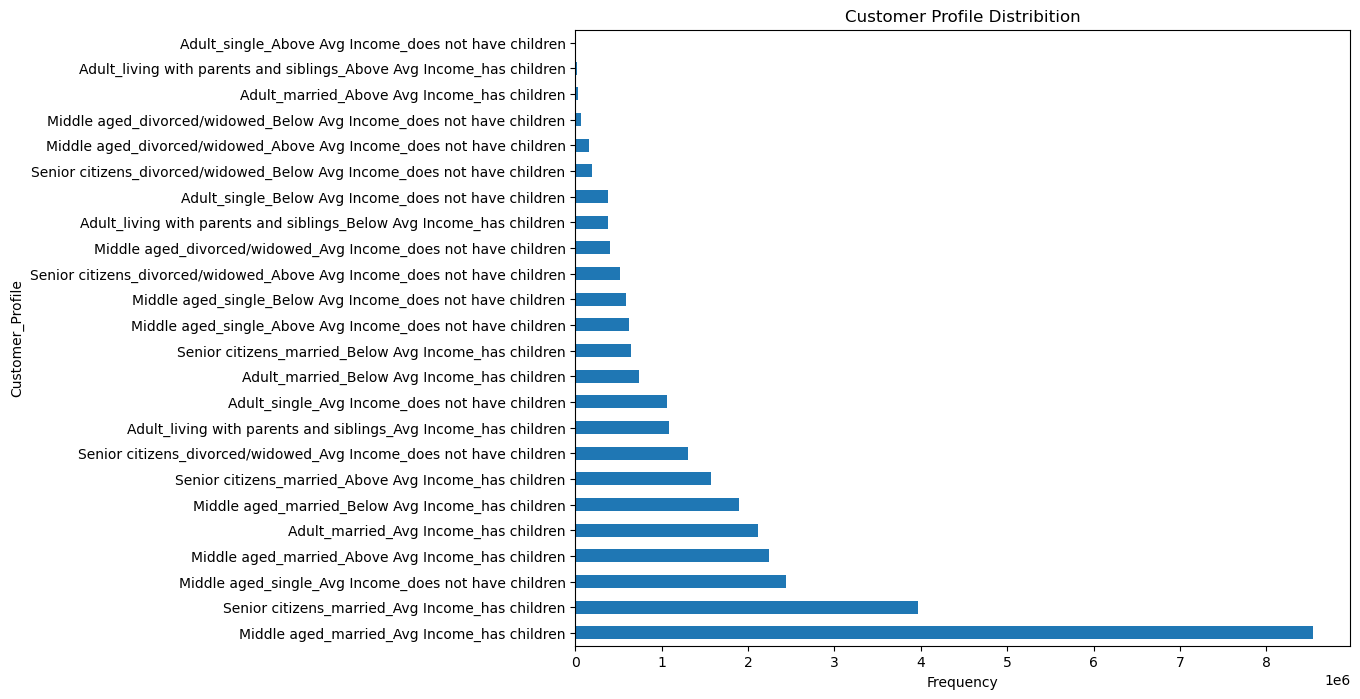

In [47]:
#Creating a Barchar with max order day for each customer_profile

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
bar_customer_profile = df_combined_filtered['customer_profile'].value_counts().plot.barh()
# Set labels and title
bar_customer_profile.set(xlabel = 'Frequency', ylabel = 'Customer_Profile', title = 'Customer Profile Distribition')


In [48]:
# Export Chart
bar_customer_profile.figure.savefig(os.path.join(path_mac, '04 Analysis','Visualizations', 'bar_customer_profile.png'),bbox_inches='tight')

# 7. Aggregate the max, mean and min variables on customer profile for usage frequency and expenditure 

In [49]:
df_combined_filtered.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'marital_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_label', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_product_price', 'spending_flag',
       'median_reorder', 'order_frequency_flag', 'region', 'activity',
       'age_group', 'income_level', 'is_parent', 'customer_profile'],
      dtype='object')

## 7.1. Max, mean and min variables on customers for usage 

### Order per customer profile 

In [50]:
order_distribution = df_combined_filtered.groupby('customer_profile').agg({'order_number':['max','mean','min']})
# Sorting the distributing by using mean in descending order
order_distribution_sorted = order_distribution.sort_values(by=('order_number', 'mean'), ascending = False)
# Viewing the result
order_distribution_sorted

order_number               
                                                            max       mean min
customer_profile                                                              
Adult_living with parents and siblings_Above Av...           99  22.980558   1
Adult_married_Above Avg Income_has children                  99  18.864730   1
Middle aged_divorced/widowed_Below Avg Income_d...           99  18.765677   1
Middle aged_divorced/widowed_Avg Income_does no...           99  18.583727   1
Middle aged_single_Above Avg Income_does not ha...           99  18.409051   1
Adult_living with parents and siblings_Avg Inco...           99  18.275073   1
Middle aged_divorced/widowed_Above Avg Income_d...           99  18.189241   1
Middle aged_single_Avg Income_does not have chi...           99  18.124817   1
Senior citizens_divorced/widowed_Above Avg Inco...           99  18.068848   1
Senior citizens_divorced/widowed_Avg Income_doe...           99  17.994035   1
Middle aged_married_Above Avg Income_has children            99  17.966936   1
Middle aged_married_Avg Income_has children                  99  17.944695   1
Adult_married_Avg Income_has children                        99  17.913444   1
Senior citizens_married_Avg Income_has children              99  17.852114   1
Senior citizens_married_Above Avg Income_has ch...           99  17.795033   1
Adult_single_Avg Income_does not have children               99  17.727379   1
Adult_single_Above Avg Income_does not have chi...           74  17.682670   1
Adult_single_Below Avg Income_does not have chi...           99  17.451304   1
Middle aged_single_Below Avg Income_does not ha...           99  17.366620   1
Adult_married_Below Avg Income_has children                  99  17.339070   1
Senior citizens_married_Below Avg Income_has ch...           99  17.183634   1
Adult_living with parents and siblings_Below Av...           99  16.999033   1
Middle aged_married_Below Avg Income_has children            99  16.843998   1
Senior citizens_divorced/widowed_Below Avg Inco...           99  16.128102   1

####  Adult_living with parents and siblings_Above Avg Income_has children has the highest mean orders. It can be seen that Adults with children places the most orders.

###  Days_since_prior_order per Cutomer_profile

In [51]:
# This will show us how frequently each customer profile orders
days_spo_distribution = df_combined_filtered.groupby('customer_profile').agg({'days_since_prior_order':['max','mean','min']})
# Sorting the distributing by using mean in descending order
days_spo_distribution_sorted = days_spo_distribution.sort_values(by=('days_since_prior_order', 'mean'), ascending = False)
# Viewing the result
days_spo_distribution_sorted

days_since_prior_order  \
                                                                      max   
customer_profile                                                            
Senior citizens_divorced/widowed_Below Avg Inco...                   30.0   
Middle aged_married_Below Avg Income_has children                    30.0   
Adult_single_Below Avg Income_does not have chi...                   30.0   
Senior citizens_married_Below Avg Income_has ch...                   30.0   
Middle aged_single_Below Avg Income_does not ha...                   30.0   
Adult_living with parents and siblings_Below Av...                   30.0   
Adult_married_Below Avg Income_has children                          30.0   
Adult_single_Avg Income_does not have children                       30.0   
Senior citizens_married_Avg Income_has children                      30.0   
Middle aged_married_Avg Income_has children                          30.0   
Middle aged_married_Above Avg Income_has children                    30.0   
Middle aged_divorced/widowed_Below Avg Income_d...                   30.0   
Middle aged_single_Avg Income_does not have chi...                   30.0   
Adult_married_Avg Income_has children                                30.0   
Middle aged_divorced/widowed_Above Avg Income_d...                   30.0   
Senior citizens_divorced/widowed_Above Avg Inco...                   30.0   
Senior citizens_married_Above Avg Income_has ch...                   30.0   
Adult_living with parents and siblings_Avg Inco...                   30.0   
Senior citizens_divorced/widowed_Avg Income_doe...                   30.0   
Adult_married_Above Avg Income_has children                          30.0   
Middle aged_divorced/widowed_Avg Income_does no...                   30.0   
Adult_single_Above Avg Income_does not have chi...                   30.0   
Middle aged_single_Above Avg Income_does not ha...                   30.0   
Adult_living with parents and siblings_Above Av...                   30.0   

                                                                    
                                                         mean  min  
customer_profile                                                    
Senior citizens_divorced/widowed_Below Avg Inco...  10.719797  0.0  
Middle aged_married_Below Avg Income_has children   10.568641  0.0  
Adult_single_Below Avg Income_does not have chi...  10.484894  0.0  
Senior citizens_married_Below Avg Income_has ch...  10.410348  0.0  
Middle aged_single_Below Avg Income_does not ha...  10.402968  0.0  
Adult_living with parents and siblings_Below Av...  10.384616  0.0  
Adult_married_Below Avg Income_has children         10.366932  0.0  
Adult_single_Avg Income_does not have children      10.273112  0.0  
Senior citizens_married_Avg Income_has children     10.214209  0.0  
Middle aged_married_Avg Income_has children         10.200821  0.0  
Middle aged_married_Above Avg Income_has children   10.197604  0.0  
Middle aged_divorced/widowed_Below Avg Income_d...  10.192584  0.0  
Middle aged_single_Avg Income_does not have chi...  10.185172  0.0  
Adult_married_Avg Income_has children               10.168086  0.0  
Middle aged_divorced/widowed_Above Avg Income_d...  10.151468  0.0  
Senior citizens_divorced/widowed_Above Avg Inco...  10.149413  0.0  
Senior citizens_married_Above Avg Income_has ch...  10.147518  0.0  
Adult_living with parents and siblings_Avg Inco...  10.132294  0.0  
Senior citizens_divorced/widowed_Avg Income_doe...  10.130290  0.0  
Adult_married_Above Avg Income_has children         10.119234  0.0  
Middle aged_divorced/widowed_Avg Income_does no...  10.110524  0.0  
Adult_single_Above Avg Income_does not have chi...  10.102560  0.0  
Middle aged_single_Above Avg Income_does not ha...  10.042242  0.0  
Adult_living with parents and siblings_Above Av...   8.692443  0.0

#### This distribution tells us that all the customer profiles purchases products every 10 days and this is consistent throughout all the customer profiles except for  Adult_living with parents and siblings_Above Avg Income_has children

## 7.2. Max, mean and min variables on customers for expenditures

### Aggregating Prices for each customer profile 

In [52]:
price_distribution = df_combined_filtered.groupby('customer_profile').agg({'prices':['max','mean','min','sum']})
# Sorting the distributing by using mean in descending order
price_distribution_sorted = price_distribution.sort_values(by=('prices', 'sum'), ascending = False)
# Viewing the result
price_distribution_sorted

prices                 \
                                                      max      mean  min   
customer_profile                                                           
Middle aged_married_Avg Income_has children          25.0  7.939940  1.0   
Senior citizens_married_Avg Income_has children      25.0  7.937138  1.0   
Middle aged_single_Avg Income_does not have chi...   25.0  7.945303  1.0   
Middle aged_married_Above Avg Income_has children    25.0  7.943823  1.0   
Adult_married_Avg Income_has children                25.0  7.949125  1.0   
Middle aged_married_Below Avg Income_has children    25.0  6.935666  1.0   
Senior citizens_married_Above Avg Income_has ch...   25.0  7.962160  1.0   
Senior citizens_divorced/widowed_Avg Income_doe...   25.0  7.933874  1.0   
Adult_living with parents and siblings_Avg Inco...   25.0  7.957152  1.0   
Adult_single_Avg Income_does not have children       25.0  7.948098  1.0   
Adult_married_Below Avg Income_has children          25.0  7.292306  1.0   
Middle aged_single_Above Avg Income_does not ha...   25.0  7.921007  1.0   
Senior citizens_married_Below Avg Income_has ch...   25.0  6.505368  1.0   
Senior citizens_divorced/widowed_Above Avg Inco...   25.0  7.947441  1.0   
Middle aged_single_Below Avg Income_does not ha...   25.0  6.992245  1.0   
Middle aged_divorced/widowed_Avg Income_does no...   25.0  7.941859  1.0   
Adult_living with parents and siblings_Below Av...   25.0  7.342429  1.0   
Adult_single_Below Avg Income_does not have chi...   25.0  7.271889  1.0   
Senior citizens_divorced/widowed_Below Avg Inco...   25.0  6.510436  1.0   
Middle aged_divorced/widowed_Above Avg Income_d...   25.0  7.956907  1.0   
Middle aged_divorced/widowed_Below Avg Income_d...   24.7  6.530520  1.0   
Adult_married_Above Avg Income_has children          25.0  7.731755  1.0   
Adult_living with parents and siblings_Above Av...   25.0  7.961543  1.0   
Adult_single_Above Avg Income_does not have chi...   25.0  7.750423  1.0   

                                                                
                                                           sum  
customer_profile                                                
Middle aged_married_Avg Income_has children         67841928.9  
Senior citizens_married_Avg Income_has children     31467745.0  
Middle aged_single_Avg Income_does not have chi...  19365960.2  
Middle aged_married_Above Avg Income_has children   17807587.5  
Adult_married_Avg Income_has children               16829306.9  
Middle aged_married_Below Avg Income_has children   13130659.3  
Senior citizens_married_Above Avg Income_has ch...  12483178.0  
Senior citizens_divorced/widowed_Avg Income_doe...  10391882.8  
Adult_living with parents and siblings_Avg Inco...   8656617.7  
Adult_single_Avg Income_does not have children       8417886.4  
Adult_married_Below Avg Income_has children          5397443.8  
Middle aged_single_Above Avg Income_does not ha...   4955302.7  
Senior citizens_married_Below Avg Income_has ch...   4164925.4  
Senior citizens_divorced/widowed_Above Avg Inco...   4128886.5  
Middle aged_single_Below Avg Income_does not ha...   4078401.9  
Middle aged_divorced/widowed_Avg Income_does no...   3196907.8  
Adult_living with parents and siblings_Below Av...   2770041.4  
Adult_single_Below Avg Income_does not have chi...   2733372.0  
Senior citizens_divorced/widowed_Below Avg Inco...   1251748.5  
Middle aged_divorced/widowed_Above Avg Income_d...   1236893.3  
Middle aged_divorced/widowed_Below Avg Income_d...    426044.6  
Adult_married_Above Avg Income_has children           239437.0  
Adult_living with parents and siblings_Above Av...    125872.0  
Adult_single_Above Avg Income_does not have chi...     96206.0

#### This distribution tells us that, while all the customer_profiles purchases products with almost same average price, Middle aged_married_Avg Income_has children have spent the most till date

# 8. Compare Customer Profiles with departments and regions 

## 8.1. Comparing departments with customer profile

In [64]:
# Top 3 departments based on customer profile
top_departments = df_combined_filtered.groupby('customer_profile')['department_id'].value_counts().groupby(level=0, group_keys=False).nlargest(3)
top_departments

customer_profile                                                      department_id
Adult_living with parents and siblings_Above Avg Income_has children  16                 2923
                                                                      4                  2830
                                                                      1                  1582
Adult_living with parents and siblings_Avg Income_has children        4                328689
                                                                      16               187335
                                                                                        ...  
Senior citizens_married_Avg Income_has children                       16               670525
                                                                      19               314806
Senior citizens_married_Below Avg Income_has children                 4                157805
                                                                      

In [65]:
# Converting top_departments into a dataframe

df_top_departments = top_departments.reset_index(name='count')
df_top_departments

,customer_profile,department_id,count
0,Adult_living with parents and siblings_Above A...,16,2923
1,Adult_living with parents and siblings_Above A...,4,2830
2,Adult_living with parents and siblings_Above A...,1,1582
3,Adult_living with parents and siblings_Avg Inc...,4,328689
4,Adult_living with parents and siblings_Avg Inc...,16,187335
...,...,...,...
67,Senior citizens_married_Avg Income_has children,16,670525
68,Senior citizens_married_Avg Income_has children,19,314806
69,Senior citizens_married_Below Avg Income_has c...,4,157805
70,Senior citizens_married_Below Avg Income_has c...,19,111529


In [66]:
# Creating Data Dictionary for 'Departments'
data_dict_dep = df_department.to_dict('index')
data_dict_dep

{0: {'Unnamed: 0': 1, 'department': 'frozen'},
 1: {'Unnamed: 0': 2, 'department': 'other'},
 2: {'Unnamed: 0': 3, 'department': 'bakery'},
 3: {'Unnamed: 0': 4, 'department': 'produce'},
 4: {'Unnamed: 0': 5, 'department': 'alcohol'},
 5: {'Unnamed: 0': 6, 'department': 'international'},
 6: {'Unnamed: 0': 7, 'department': 'beverages'},
 7: {'Unnamed: 0': 8, 'department': 'pets'},
 8: {'Unnamed: 0': 9, 'department': 'dry goods pasta'},
 9: {'Unnamed: 0': 10, 'department': 'bulk'},
 10: {'Unnamed: 0': 11, 'department': 'personal care'},
 11: {'Unnamed: 0': 12, 'department': 'meat seafood'},
 12: {'Unnamed: 0': 13, 'department': 'pantry'},
 13: {'Unnamed: 0': 14, 'department': 'breakfast'},
 14: {'Unnamed: 0': 15, 'department': 'canned goods'},
 15: {'Unnamed: 0': 16, 'department': 'dairy eggs'},
 16: {'Unnamed: 0': 17, 'department': 'household'},
 17: {'Unnamed: 0': 18, 'department': 'babies'},
 18: {'Unnamed: 0': 19, 'department': 'snacks'},
 19: {'Unnamed: 0': 20, 'department': 'deli

In [67]:
# Create a mapping dictionary from 'data_dict_dep'
department_mapping = {id_: data_dict_dep[id_]['department'] for id_ in data_dict_dep}

# Map 'department_id' values to department names
df_top_departments['department_name'] = df_top_departments['department_id'].map(department_mapping)

# Reset index to make 'department_id' and 'customer_profile' regular columns
df_top_departments.reset_index(drop=True, inplace=True)

# Display the result
print(df_top_departments)



                                     customer_profile  department_id   count  \
0   Adult_living with parents and siblings_Above A...             16    2923   
1   Adult_living with parents and siblings_Above A...              4    2830   
2   Adult_living with parents and siblings_Above A...              1    1582   
3   Adult_living with parents and siblings_Avg Inc...              4  328689   
4   Adult_living with parents and siblings_Avg Inc...             16  187335   
..                                                ...            ...     ...   
67    Senior citizens_married_Avg Income_has children             16  670525   
68    Senior citizens_married_Avg Income_has children             19  314806   
69  Senior citizens_married_Below Avg Income_has c...              4  157805   
70  Senior citizens_married_Below Avg Income_has c...             19  111529   
71  Senior citizens_married_Below Avg Income_has c...             16   93395   

   department_name  
0        household

In [68]:
# Copying the results in a Excel Sheet
df_top_departments.to_clipboard()

In [69]:
# Creating subset with top 1 department for each customer profile
# Find the index of the rows with the highest count for each unique customer_profile
df_top_departments_subset = df_top_departments.groupby('customer_profile')['count'].idxmax()

# Create a subset using the obtained indices
df_top_departments_subset = df_top_departments.loc[df_top_departments_subset]

# Reseting index for this subset
df_top_departments_subset.reset_index(drop=True, inplace=True)

# Display the subset
df_top_departments_subset

,customer_profile,department_id,count,department_name
0,Adult_living with parents and siblings_Above A...,16,2923,household
1,Adult_living with parents and siblings_Avg Inc...,4,328689,alcohol
2,Adult_living with parents and siblings_Below A...,4,99020,alcohol
3,Adult_married_Above Avg Income_has children,4,6439,alcohol
4,Adult_married_Avg Income_has children,4,638446,alcohol
5,Adult_married_Below Avg Income_has children,4,198890,alcohol
6,Adult_single_Above Avg Income_does not have ch...,4,2339,alcohol
7,Adult_single_Avg Income_does not have children,4,322340,alcohol
8,Adult_single_Below Avg Income_does not have ch...,4,100438,alcohol
9,Middle aged_divorced/widowed_Above Avg Income_...,4,45579,alcohol


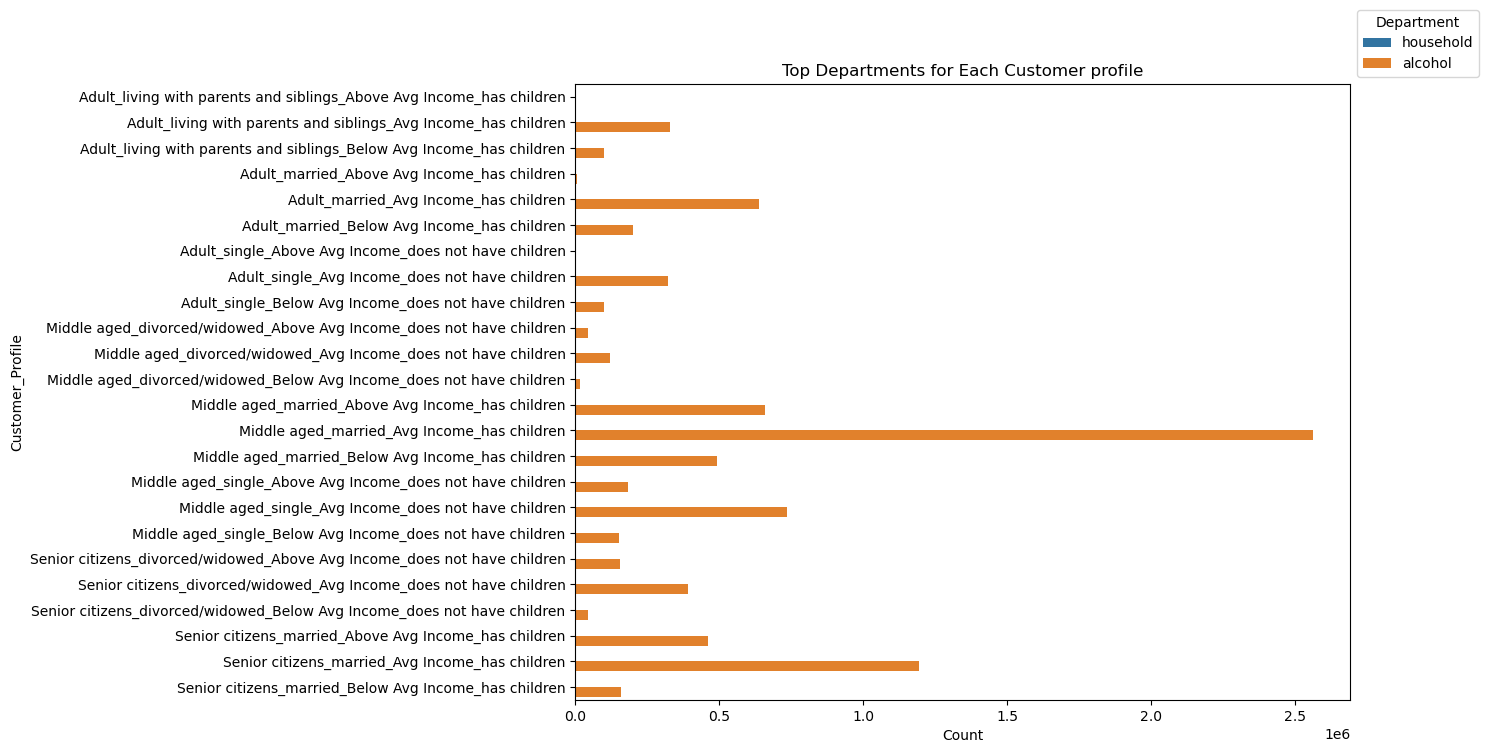

In [70]:
#Creating a Barchar with top departments for each customer_profile

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
bar_top_dept_custprof = sns.barplot(x='count', y='customer_profile', hue='department_name', data=df_top_departments_subset, dodge=True)

# Set labels and title
bar_top_dept_custprof.set(xlabel = 'Count', ylabel = 'Customer_Profile', title = 'Top Departments for Each Customer profile')


# Show the legend
plt.legend(title='Department', bbox_to_anchor=(1, 1))

# Show the plot
#plt.show()

#Saving the chart
#bar_top_dept_custprof.savefig(os.path.join(path_mac, '04 Analysis','Visualizations', 'bar_top_dept_custprof.png'), bbox_inches='tight')

In [71]:
#Exporting the chart
bar_top_dept_custprof.figure.savefig(os.path.join(path_mac, '04 Analysis','Visualizations', 'bar_top_dept_custprof.png'),bbox_inches='tight')

### Alcohol is the most popular department for all customer profiles except for 'Adult_living with parents and siblings_Above Avg Income_has children'.

### Middle aged_married_Avg Income_has children consumes the most Alcohol

## 8.2. Comparing regions with customer profile

In [62]:
# Looking at the value count for region column
df_combined_filtered[['region']].value_counts()

region   
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

In [102]:
# Grouping customer profile with regions
customer_profile_per_region = df_combined_filtered.groupby('customer_profile')['region'].value_counts()
# Viewing the result
customer_profile_per_region

customer_profile                                                      region   
Adult_living with parents and siblings_Above Avg Income_has children  South          8334
                                                                      West           3722
                                                                      Midwest        3115
                                                                      Northeast       774
Adult_living with parents and siblings_Avg Income_has children        South        368086
                                                                                    ...  
Senior citizens_married_Avg Income_has children                       Northeast    718779
Senior citizens_married_Below Avg Income_has children                 South        213456
                                                                      West         169466
                                                                      Midwest      144155
                    

In [134]:
# Using cross to compare customer profile with regions to get a better result
cross_tab_region = pd.crosstab(df_combined_filtered['customer_profile'], df_combined_filtered['region'])

# Viewing the result
cross_tab_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Adult_living with parents and siblings_Above Avg Income_has children,3115,774,8334,3722
Adult_living with parents and siblings_Avg Income_has children,260226,195730,368086,263920
Adult_living with parents and siblings_Below Avg Income_has children,88094,59926,129037,100208
Adult_married_Above Avg Income_has children,8177,5127,8212,9851
Adult_married_Avg Income_has children,495341,378385,690606,552958
Adult_married_Below Avg Income_has children,171143,119541,262037,187435
Adult_single_Above Avg Income_does not have children,3982,2300,4573,1684
Adult_single_Avg Income_does not have children,247083,185368,368566,258180
Adult_single_Below Avg Income_does not have children,78677,76833,121200,99172


In [85]:
cross_tab_region

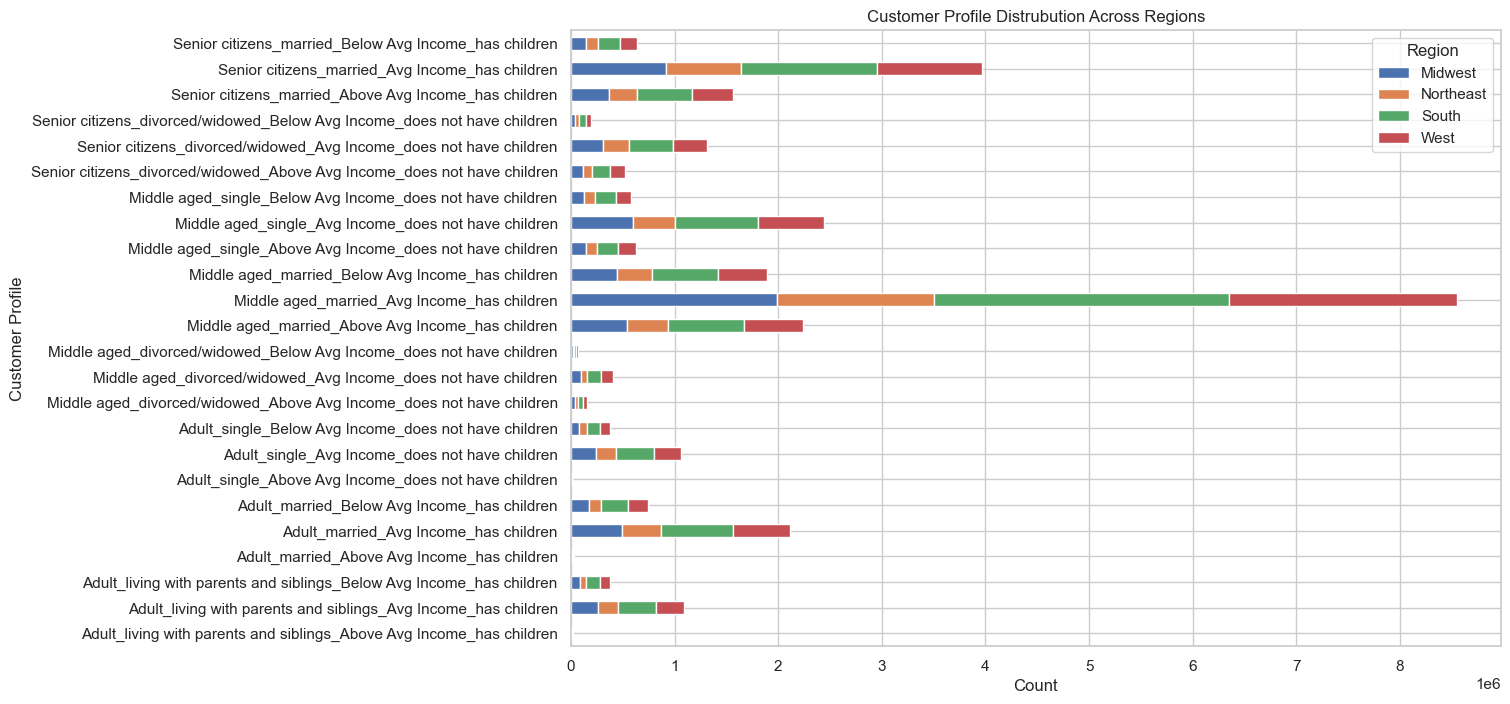

In [135]:
#Creating a stacked bar chart for Customer Profile distribution across Regions

#plt.figure(figsize=(10, 8))
bar_cust_prof_region = cross_tab_region.plot(kind='barh', stacked=True, figsize=(12, 8))

# Set labels and title
bar_cust_prof_region.set(xlabel = 'Count', ylabel = 'Customer Profile', title = 'Customer Profile Distrubution Across Regions')


# Show the legend
plt.legend(title='Region', bbox_to_anchor=(1, 1))

In [136]:
# Exporting the Horizontal Stacked Bar Chart
bar_cust_prof_region.figure.savefig(os.path.join(path_mac, '04 Analysis','Visualizations', 'bar_cust_prof_region.png'),bbox_inches='tight')

### If we are taking the top three Cutomer Profiles, the top region is  South followed by West and then followed by Midwest. Northeast has the lowest counts for all Customer profiles.

#### Senior Citizen counts are higher in South
